### ДЗ 2
Гимишян А. - М05-312

In [2]:
import pandas as pd

# Загрузка данных
data = pd.read_excel("data_innovation.xls")

# Вывод первых нескольких строк для ознакомления
data.head()

,Sales,growth_technological,growth_marketing,share_RD,share_equipments,patents,cooperation,support,lab,joint,climate,share_technology,emp,growth_innovation,fin_support
0,3.59,11.67,7.82,34.1,36.90,10,1,0,1,0,6,0.80,0.48,12.86,0.000000
1,1.28,2.34,4.70,27.1,16.56,1,0,0,0,0,10,0.02,0.46,2.29,0.000000
2,0.48,11.73,7.07,7.9,31.32,0,0,0,0,0,5,0.06,0.38,11.79,0.000000
3,0.86,9.01,3.91,19.0,16.29,3,0,0,0,0,5,0.31,0.10,8.95,0.000000
4,2.24,8.93,4.20,31.2,32.40,3,1,1,0,0,8,0.07,0.36,9.94,0.897416


In [3]:
data.describe()

,Sales,growth_technological,growth_marketing,share_RD,share_equipments,patents,cooperation,support,lab,joint,climate,share_technology,emp,growth_innovation,fin_support
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.913540,6.823790,4.453800,24.937728,27.053726,1.688000,0.341000,0.007000,0.265000,0.141000,5.277000,0.320530,0.343880,7.369270,0.003920
std,1.980913,5.340042,1.391296,17.189609,18.381377,3.603837,0.474283,0.083414,0.441554,0.348196,2.713233,0.276389,0.299723,5.372921,0.053104
min,0.130000,0.090000,3.020000,-1.300000,0.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000
25%,0.747500,3.377500,3.670000,13.200000,12.847500,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.070000,0.120000,3.907500,0.000000
50%,1.280000,5.460000,4.080000,20.700000,22.860000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.240000,0.250000,5.960000,0.000000
75%,2.322500,8.805000,4.682500,32.025000,37.372500,0.000000,1.000000,0.000000,1.000000,0.000000,7.250000,0.510000,0.492500,9.382500,0.000000
max,24.040000,52.120000,15.610000,92.654850,89.100000,19.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.430000,52.110000,0.897416


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sales                 1000 non-null   float64
 1   growth_technological  1000 non-null   float64
 2   growth_marketing      1000 non-null   float64
 3   share_RD              1000 non-null   float64
 4   share_equipments      1000 non-null   float64
 5   patents               1000 non-null   int64  
 6   cooperation           1000 non-null   int64  
 7   support               1000 non-null   int64  
 8   lab                   1000 non-null   int64  
 9   joint                 1000 non-null   int64  
 10  climate               1000 non-null   int64  
 11  share_technology      1000 non-null   float64
 12  emp                   1000 non-null   float64
 13  growth_innovation     1000 non-null   float64
 14  fin_support           1000 non-null   float64
dtypes: float64(9), int64(6

Построим гистограмму для 'Sales', чтобы увидеть распределение

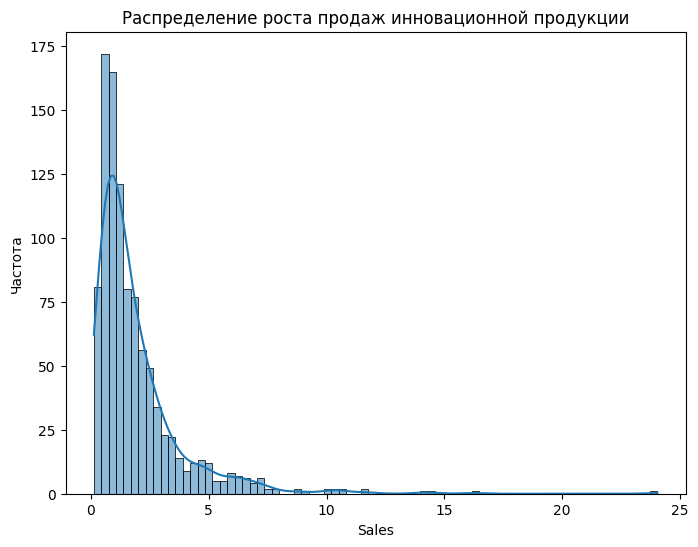

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма распределения переменной Sales
plt.figure(figsize=(8, 6))
sns.histplot(data['Sales'], kde=True)
plt.title('Распределение роста продаж инновационной продукции')
plt.xlabel('Sales')
plt.ylabel('Частота')
plt.show()

Корреляционный анализ поможет оценить степень линейной взаимосвязи между переменными. Мы можем построить матрицу корреляций и визуализировать ее с помощью тепловой карты.

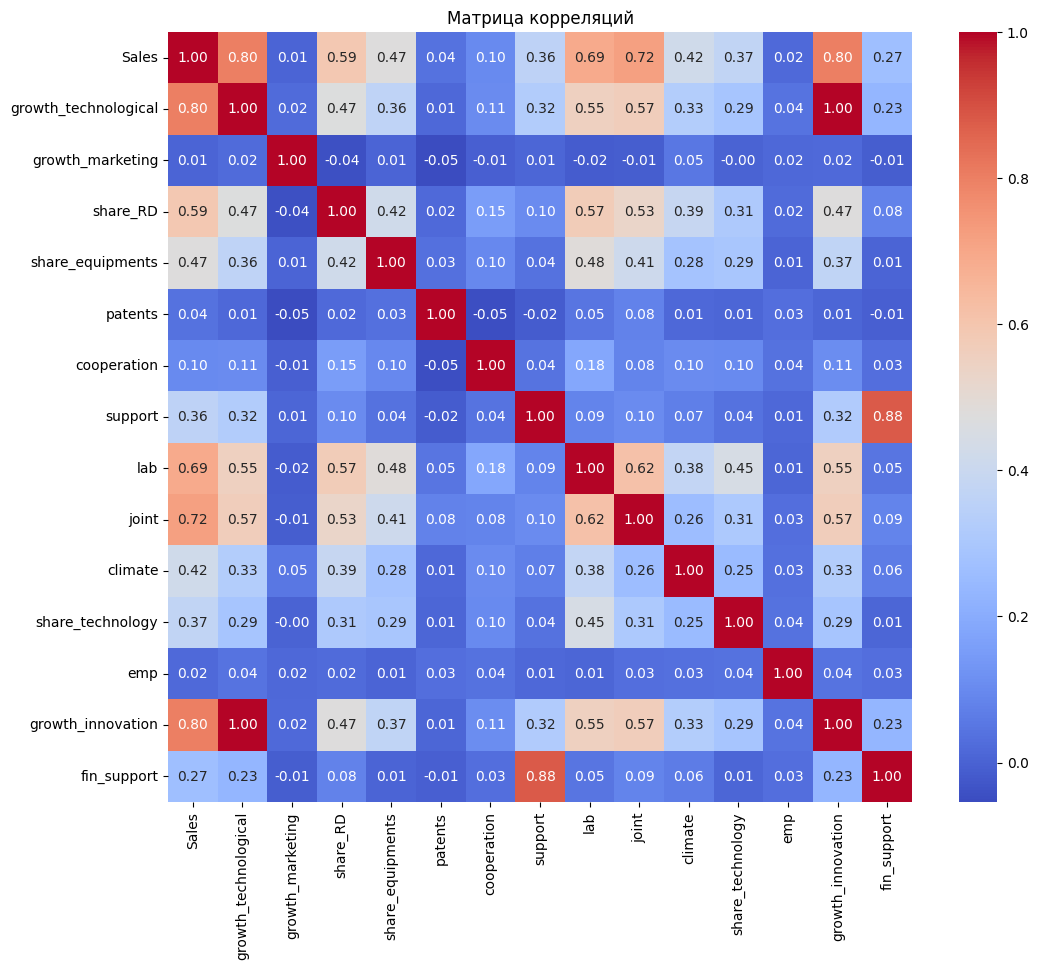

In [6]:
# Матрица корреляций
corr_matrix = data.corr()

# Тепловая карта корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

Мультиколлинеарность может быть проверена с помощью метода variance inflation factor (VIF). Высокие значения VIF могут указывать на наличие мультиколлинеарности между независимыми переменными.

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
# Вычисление VIF для каждой независимой переменной
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

In [9]:
# Исключение зависимой переменной из данных для VIF
X = data.drop(columns=['Sales'])

In [10]:
# Расчет VIF
vif_results = calculate_vif(X)
print(vif_results)

                 feature         VIF
0   growth_technological  508.089304
1       growth_marketing    6.070145
2               share_RD    5.294448
3       share_equipments    4.321660
4                patents    1.210515
5            cooperation    1.577796
6                support    4.832720
7                    lab    3.052108
8                  joint    2.244754
9                climate    5.759804
10      share_technology    2.936625
11                   emp    2.236171
12     growth_innovation  549.790075
13           fin_support    4.554178


Для начала построим уравнение регрессии с помощью пошагового алгоритма, добавляя поочередно переменные и оценивая их значимость

In [11]:
import statsmodels.api as sm

In [12]:
# Добавляем столбец с константой
X = sm.add_constant(data.drop(columns=['Sales']))

In [13]:
# Пошаговый отбор признаков
selected_features = []
remaining_features = list(X.columns)
while len(remaining_features) > 0:
    p_values = []
    models = []
    for feature in remaining_features:
        model = sm.OLS(data['Sales'], X[selected_features + [feature]]).fit()
        p_values.append((feature, model.pvalues[feature]))
        models.append(model)
    best_feature, min_p_value = min(p_values, key=lambda x: x[1])
    if min_p_value < 0.05:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
    else:
        break

In [14]:
# Выбранные переменные
print("Выбранные переменные:", selected_features)

Выбранные переменные: ['growth_technological', 'joint', 'lab', 'support', 'climate', 'share_RD', 'fin_support', 'const', 'share_equipments', 'cooperation']


In [15]:
# Финальная модель
final_model = models[-1]
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     444.2
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:37:57   Log-Likelihood:                -1250.4
No. Observations:                1000   AIC:                             2523.
Df Residuals:                     989   BIC:                             2577.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
growth_technological     0.2112 

Для анализа гетероскедастичности ошибок построим график остатков по предсказанным значениям и по переменным, входящим в модель.

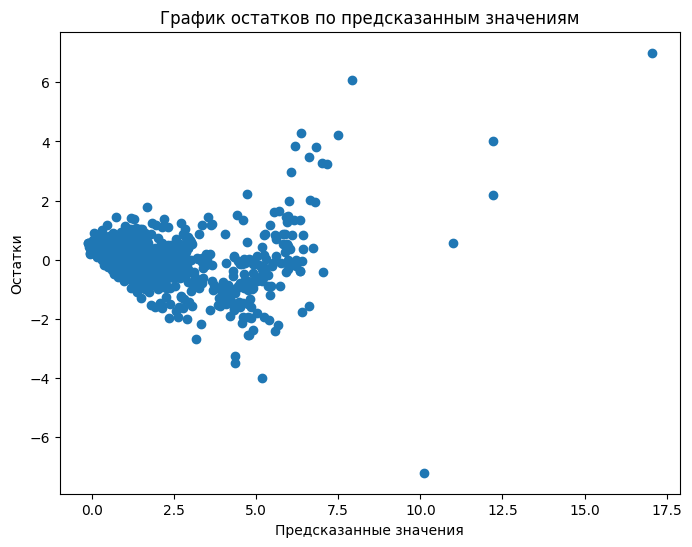

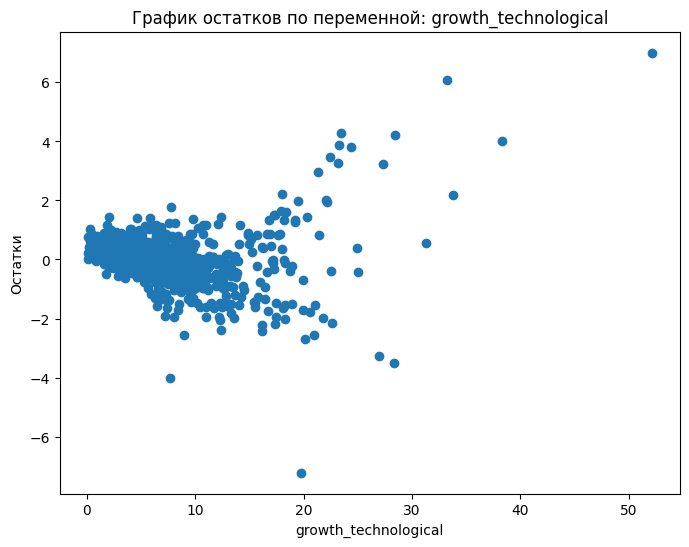

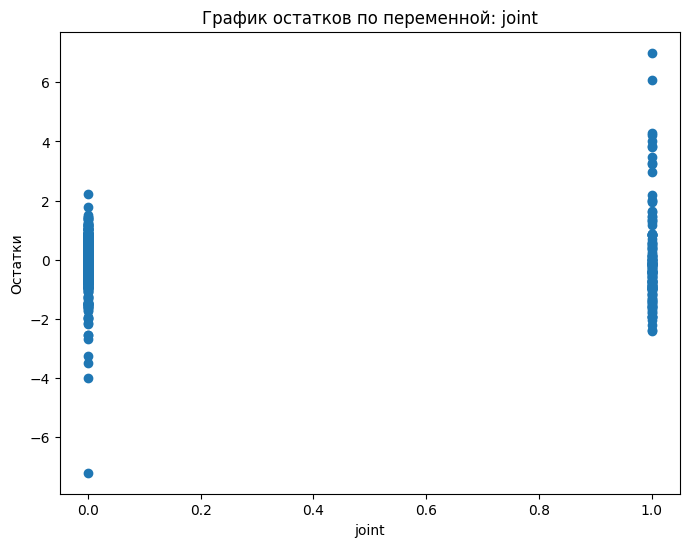

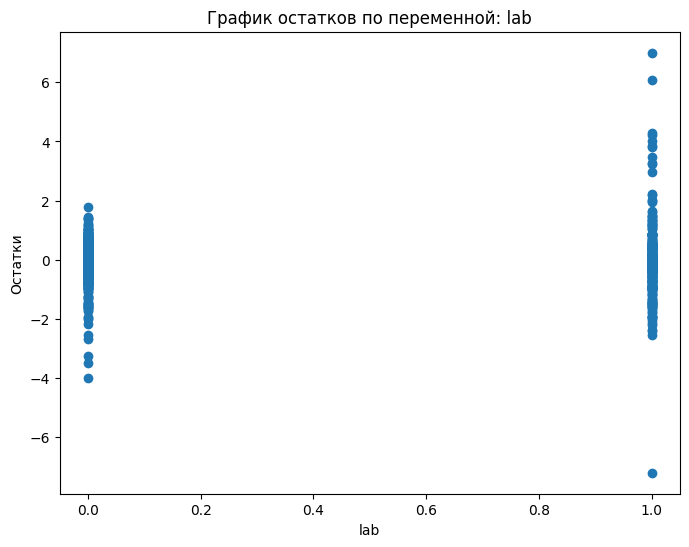

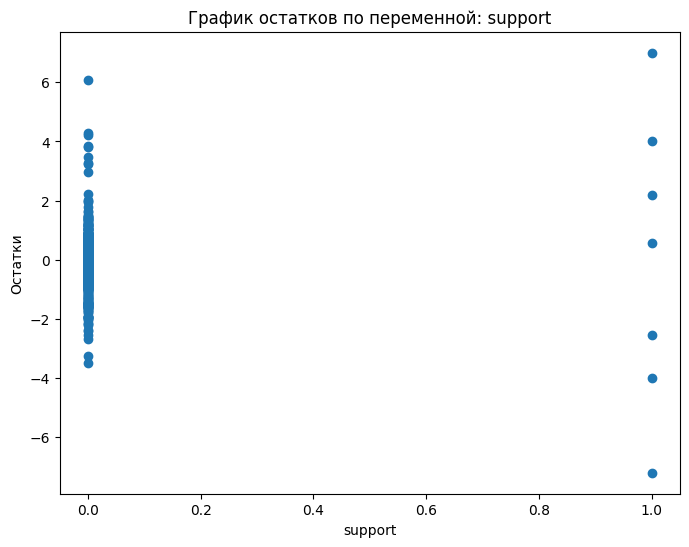

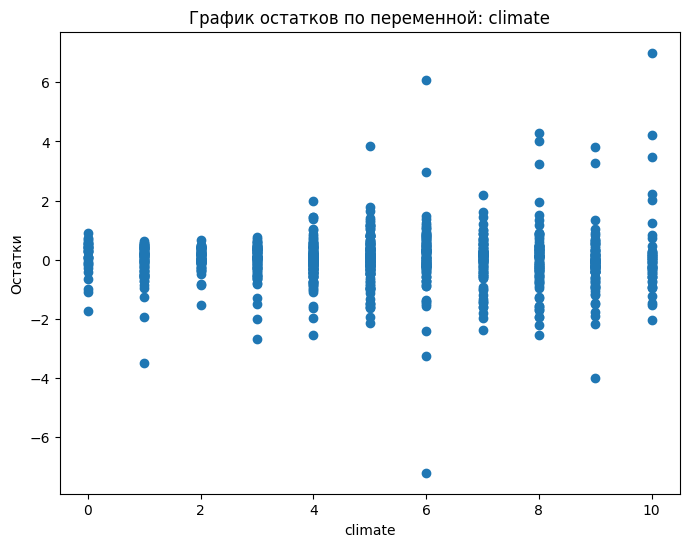

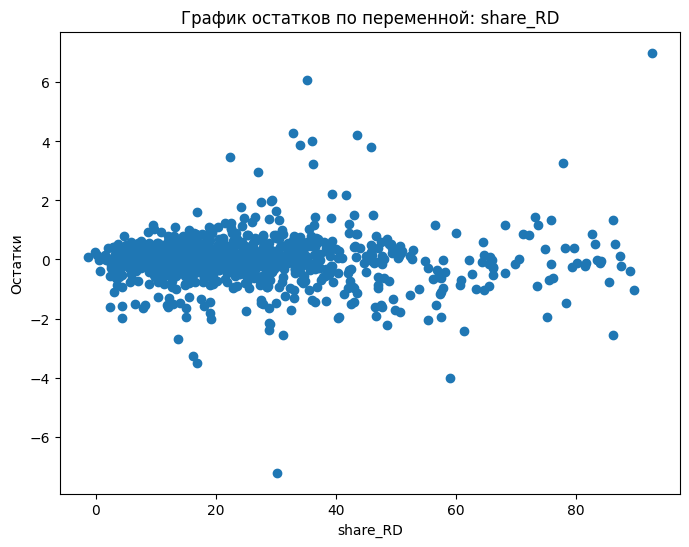

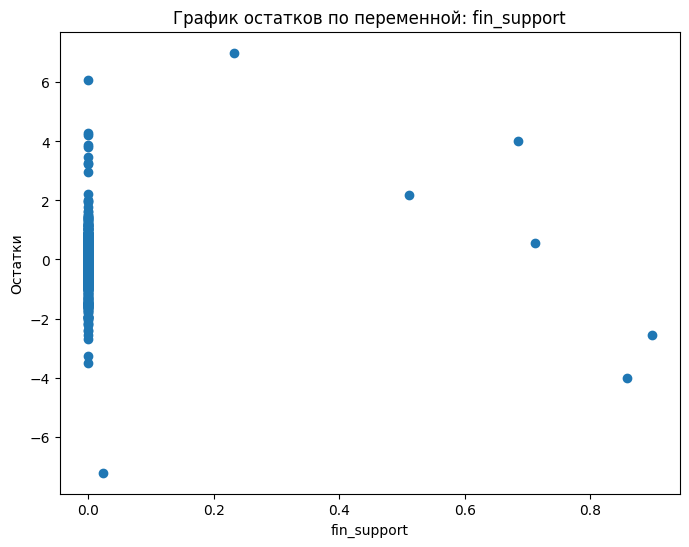

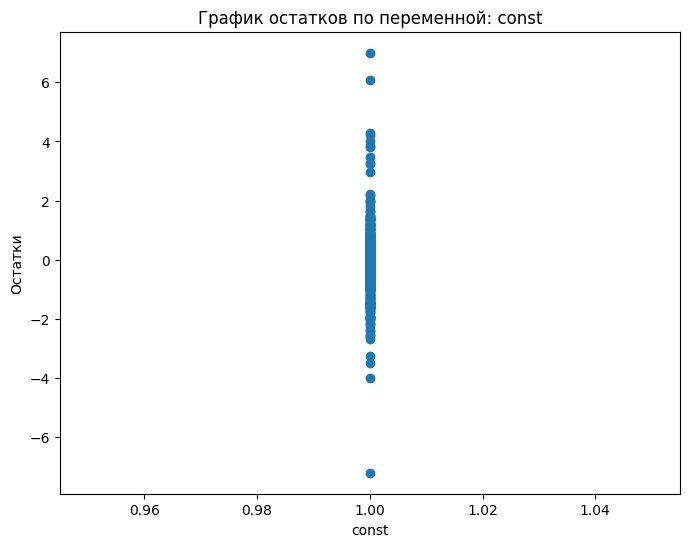

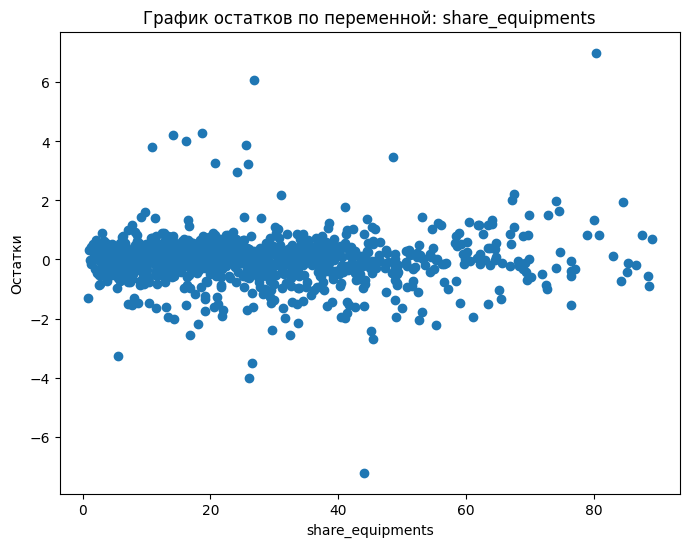

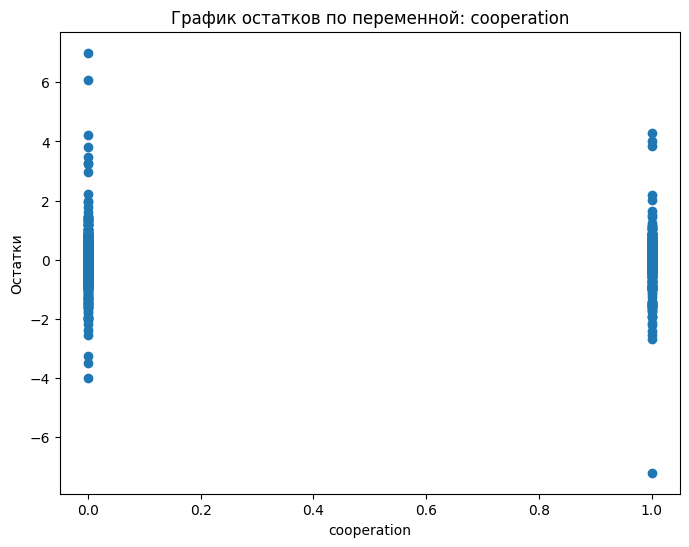

In [19]:
# График остатков по предсказанным значениям
plt.figure(figsize=(8, 6))
plt.scatter(final_model.fittedvalues, final_model.resid)
plt.title('График остатков по предсказанным значениям')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

# Графики остатков по переменным
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], final_model.resid)
    plt.title('График остатков по переменной: ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Остатки')
    plt.show()

Для проверки гомоскедастичности ошибок используем тесты Бройша-Пагана и Уайта.

In [20]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Тест Бройша-Пагана
_, p_bp, _, _ = het_breuschpagan(final_model.resid, X[selected_features])
print("p-value теста Бройша-Пагана:", p_bp)

# Тест Уайта
white_results = het_white(final_model.resid, X[selected_features])
print("p-value теста Уайта:", white_results[1])

p-value теста Бройша-Пагана: 3.417774476369308e-130
p-value теста Уайта: 1.9017188371519247e-157


Если значения p-value тестов Бройша-Пагана и Уайта меньше уровня значимости (обычно принимаемого равным 0.05), то мы можем сделать вывод о наличии гетероскедастичности ошибок.

In [21]:
# Тесты показывают наличие гетероскедастичности
# Мы можем воспользоваться поправкой Уайта


if p_bp < 0.05 or white_results[1] < 0.05:
    final_model = final_model.get_robustcov_results(cov_type='HC3')
    print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     201.0
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          3.07e-230
Time:                        17:41:35   Log-Likelihood:                -1250.4
No. Observations:                1000   AIC:                             2523.
Df Residuals:                     989   BIC:                             2577.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
growth_technological     0.2112 

Построим модель линейной регрессии с регуляризацией Ридж (Ridge) с применением кросс-валидации

In [22]:
from sklearn.linear_model import RidgeCV

# Создание объекта RidgeCV с автоматическим подбором параметра alpha
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

# Обучение модели
ridge_model.fit(X, data['Sales'])

# Вывод оптимального значения alpha
print("Оптимальное значение alpha для Ridge:", ridge_model.alpha_)

# Вывод коэффициентов модели
print("Коэффициенты модели Ridge:", ridge_model.coef_)

Оптимальное значение alpha для Ridge: 10.0
Коэффициенты модели Ridge: [ 0.00000000e+00  2.33239415e-01  5.24321291e-04  9.87934599e-03
  7.13107394e-03  1.11967548e-03 -1.27450074e-01  1.36176126e+00
  7.08556325e-01  1.30588604e+00  6.53401210e-02  1.91804949e-01
 -9.50469736e-02 -6.08728703e-02  5.48952165e-01]


Построим модель линейной регрессии с регуляризацией Лассо (Lasso) с применением кросс-валидации

In [23]:
from sklearn.linear_model import LassoCV

# Создание объекта LassoCV с автоматическим подбором параметра alpha
lasso_model = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)

# Обучение модели
lasso_model.fit(X, data['Sales'])

# Вывод оптимального значения alpha
print("Оптимальное значение alpha для Lasso:", lasso_model.alpha_)

# Вывод коэффициентов модели
print("Коэффициенты модели Lasso:", lasso_model.coef_)

Оптимальное значение alpha для Lasso: 0.1
Коэффициенты модели Lasso: [ 0.          0.21978643 -0.          0.02114089  0.01340474  0.00205144
 -0.          0.          0.08700418  0.31007838  0.05808732  0.
 -0.          0.          0.        ]


Теперь сравним полученные модели с лучшей моделью из пункта 2 (обычная линейная регрессия без регуляризации).

In [24]:
# Вывод коэффициентов лучшей модели без регуляризации
print("Коэффициенты лучшей модели без регуляризации:", final_model.params)

Коэффициенты лучшей модели без регуляризации: [ 0.21119526  1.54885921  0.8087205   5.87834013  0.06933755  0.00868323
 -3.36345437 -0.25377592  0.00694251 -0.14331031 -0.06186313]


Для выбора лучшей модели с регуляризацией сравним их значения коэффициентов, а также сравним значения коэффициента детерминации (R-squared) и среднеквадратической ошибки (RMSE) на тестовых данных.

In [28]:
from sklearn.metrics import mean_squared_error


# Предсказания модели Ridge
y_pred_ridge = ridge_model.predict(X)

# Предсказания модели Lasso
y_pred_lasso = lasso_model.predict(X)

# Рассчет RMSE для всех моделей
rmse_ridge = mean_squared_error(data['Sales'], y_pred_ridge, squared=False)
rmse_lasso = mean_squared_error(data['Sales'], y_pred_lasso, squared=False)

# Вывод RMSE для всех моделей
print("RMSE модели Ridge:", rmse_ridge)
print("RMSE модели Lasso:", rmse_lasso)

RMSE модели Ridge: 0.8685295070234427
RMSE модели Lasso: 0.9976211092250781


Исходя из полученных значений RMSE:

- RMSE модели Ridge: 0.8685
- RMSE модели Lasso: 0.9976

Мы видим, что RMSE модели Ridge немного меньше, чем у модели Lasso. Модель Ridge имеет немного лучшую точность предсказания по сравнению с моделью Lasso на этих данных.